In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

/kaggle/input/trailer-prices/trailerdata1.csv
/kaggle/input/trailer-prices/trailerdata2.csv


# About this notebook
This notebook aims to predict the price of a product (trailer) for an early stage start-up. The data has been anonymized. Due to the web infrastructure of manufacturers of similar trailers, the data was collected by hand. This project is still on-going and updated regularly. 

## Current Challenges
The data has been collected by hand as it was formatted differently for nearly every row. Some points have been imputed by hand elsewhere, based off of photos, educated guesses and industry knowledge. Enough data has been collected so that feature engineering is now underway. One major point is how to encompass the information about number of doors and windows, experimenting with different ways of tackling these columns is currently underway. 

In [2]:
#The trailer price data is saved in a csv file and must first be loaded
data = pd.read_csv('/kaggle/input/trailer-prices/trailerdata1.csv', sep=';')
data.head(5)

,Manufacturer,model,total dry weight,length,Cabin exterior width,exterior height,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,...,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,USB Cost,Base price
0,Sunset Park RV,Sunray 109E,1660,198.0,102.0,84.0,54.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,14879
1,Sunset Park RV,Sunray Classic 109,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,12500
2,Sunset Park RV,Sunray Classic 109,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,14997
3,Sunset Park RV,Sunray Classic 129,1930,185.0,102.0,105.0,73.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,15965
4,Sunset Park RV,Classic 149,2260,188.0,102.0,108.0,74.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,No,Yes,Yes,Yes,0,18689


In [3]:
#inspect the data types of each column
#for modeling everything needs to be and int or float
data.dtypes

Manufacturer                      object
model                             object
total dry weight                   int64
length                           float64
Cabin exterior width             float64
exterior height                  float64
interior height highest point    float64
Usage Intent- On or Off Road      object
A/C                               object
Roof Rack                         object
Driver Side Window                object
Driver Side Door                  object
Driver Side Door Window           object
Passenger Side Door               object
Passenger Side Door Window        object
Passenger Side Window             object
Spare Tire                        object
Battery Power Supply              object
Cabinets                          object
Refrigerator                      object
Awning                            object
Solar                             object
STOVE                             object
USB Charging                      object
USB Cost        

In [4]:
#checking for missing values
#missing values must be dealt with for ML modeling
data.isna().sum()

Manufacturer                     0
model                            5
total dry weight                 0
length                           0
Cabin exterior width             0
exterior height                  0
interior height highest point    0
Usage Intent- On or Off Road     0
A/C                              0
Roof Rack                        0
Driver Side Window               0
Driver Side Door                 0
Driver Side Door Window          0
Passenger Side Door              0
Passenger Side Door Window       0
Passenger Side Window            0
Spare Tire                       0
Battery Power Supply             0
Cabinets                         0
Refrigerator                     0
Awning                           0
Solar                            0
STOVE                            0
USB Charging                     0
USB Cost                         0
Base price                       0
dtype: int64

There are no missing values because the data has been imputed by hand beforehand. 

In [5]:
data.shape

(96, 26)

In [6]:
#these columns will be renamed to remove the space in the heading 
data = data.rename(columns={"exterior height": "eheight", "total dry weight": "tdweight", "interior height":"intheight", "exterior width":"ewidth", "Base price":"price"})

In [7]:
data['Passenger Side Door Window'].value_counts()

Yes       71
Option    19
No         6
Name: Passenger Side Door Window, dtype: int64

In [8]:
#data2['intheight'] = data2['intheight'].fillna(data2['intheight'].mean())
#data2['ewidth'] = data2['ewidth'].fillna(data2['ewidth'].mean())

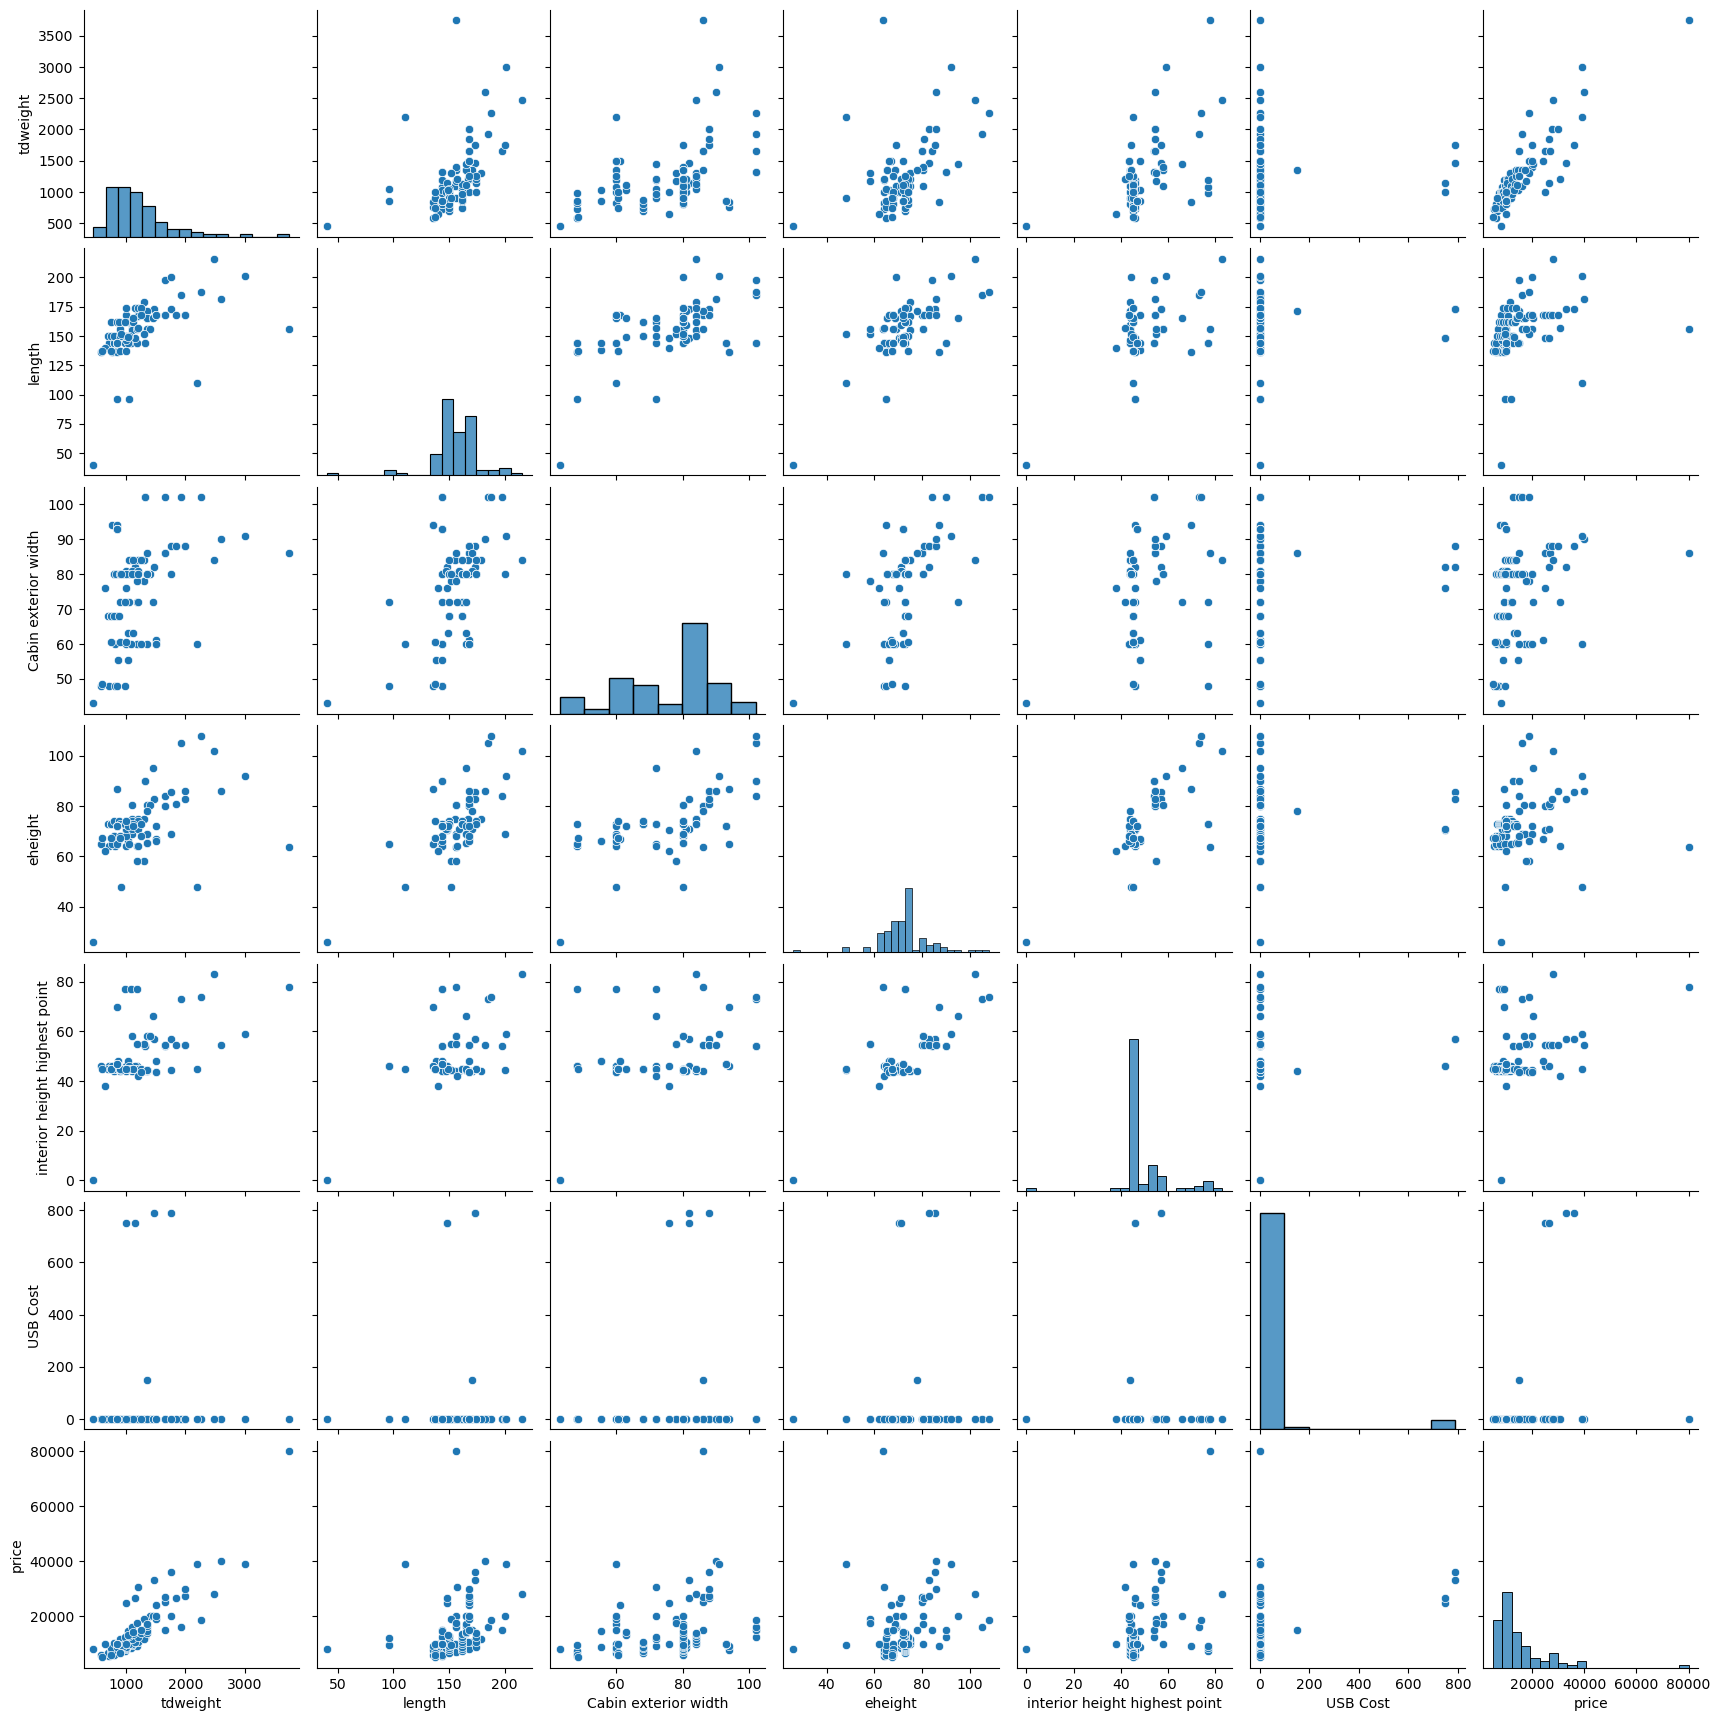

In [9]:
sns.pairplot(data)

Of all the variables, total dry weight appears to be the most correlated with the price. Let's look at it a bit more closely. 

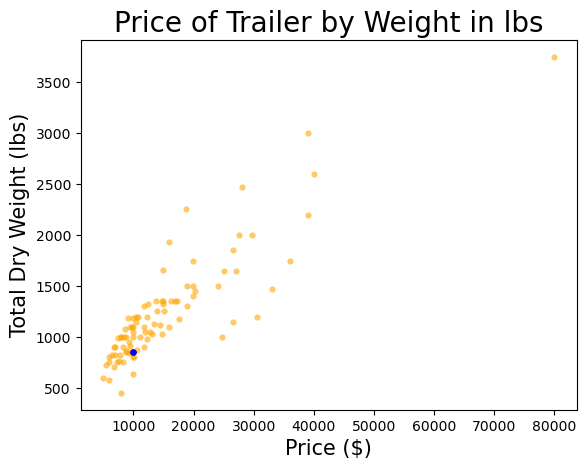

In [10]:
# values of x
x=data['price']
y= data['tdweight']

col = []
  
for i in range(0, len(x)):
    #the target trailer in blue
    if x[i]==9995:
        col.append('blue')  
    #all other trailers in orange
    else:
        col.append('orange') 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 20,
                linewidth = 0, alpha=0.6)
    plt.title("Price of Trailer by Weight in lbs", fontsize=20)
    plt.ylabel("Total Dry Weight (lbs)", fontsize=15)
    plt.xlabel("Price ($)", fontsize=15)
      
plt.show()

Now let's look at how a few features map onto the weight vs. price

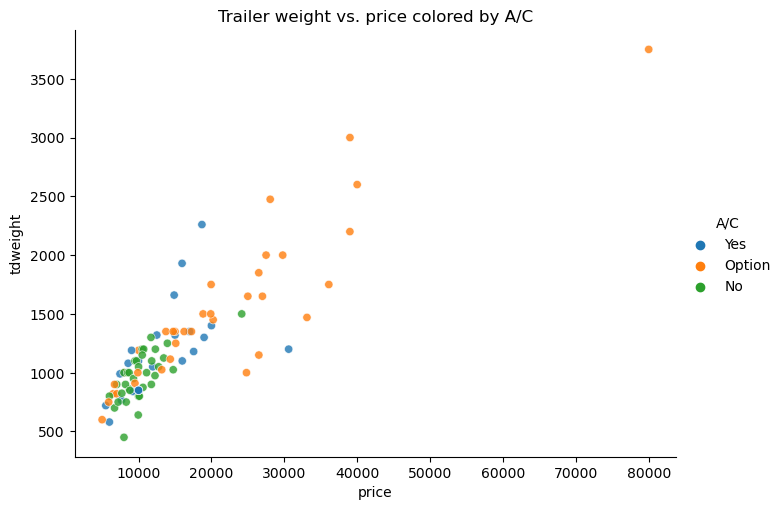

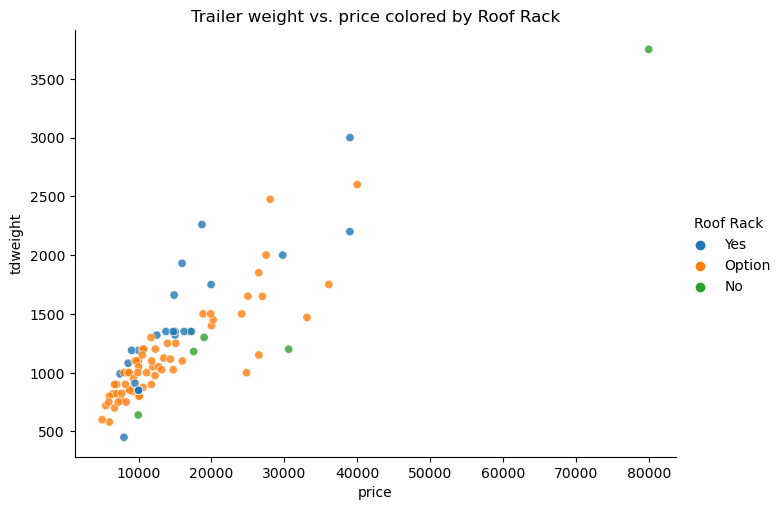

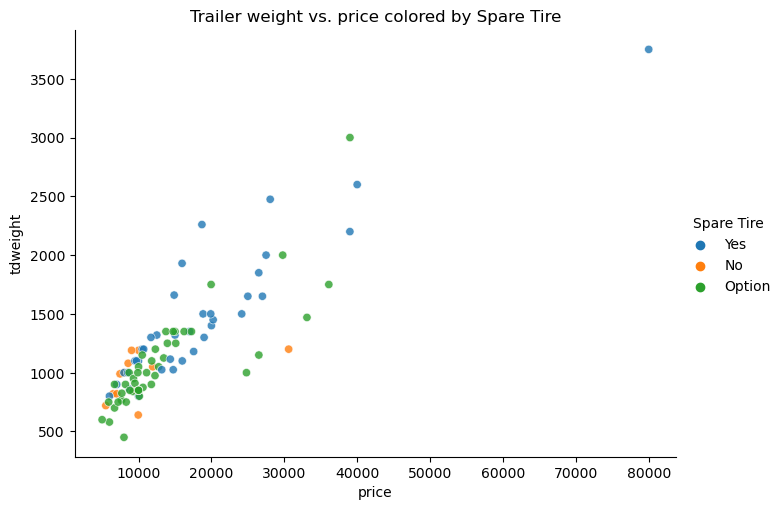

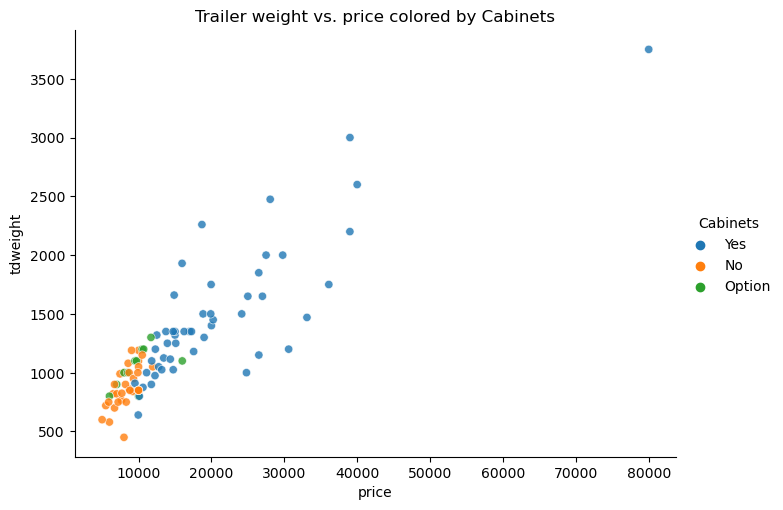

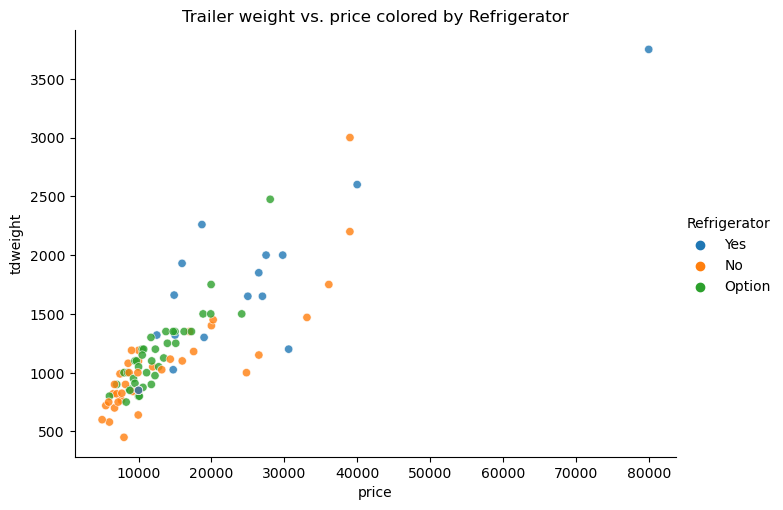

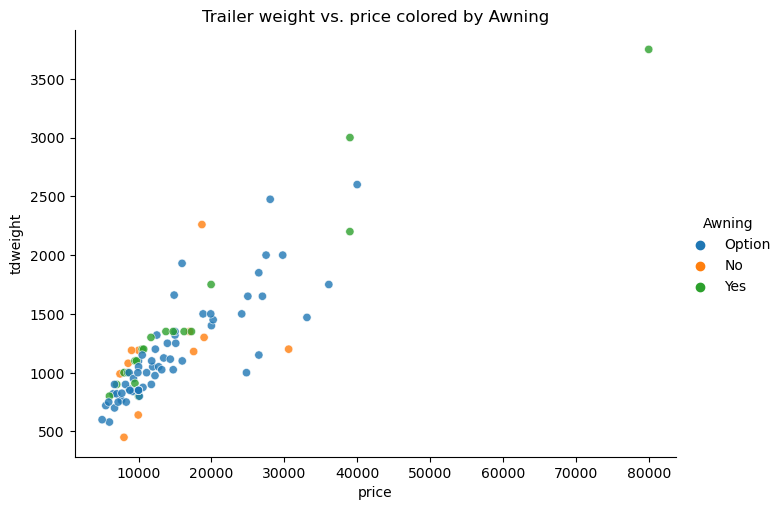

In [11]:
for c in ['A/C', 'Roof Rack', 'Spare Tire', 'Cabinets', 'Refrigerator', 'Awning']:
    sns.relplot(data=data, x='price', y='tdweight', hue=f"{c}", aspect=1.4, alpha=0.8)
    plt.title(f'Trailer weight vs. price colored by {c.title()}')
    plt.show()

In [12]:
#select the categorical data for encoding
cat_data = data.iloc[:, 7:24]
cat_data

,Usage Intent- On or Off Road,A/C,Roof Rack,Driver Side Window,Driver Side Door,Driver Side Door Window,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging
0,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
1,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
2,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
3,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
4,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,On Road/Off Road,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,No,No,No,Option,No,No,No
92,On Road/Off Road,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,No,No,No,Option,No,No,Yes
93,On Road/Off Road,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,No,No,No,Option,No,Yes,Yes
94,On Road/Off Road,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Option,No,No,No,Option,Yes,Yes,Yes


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#label encode the data to prepare for modeling
#label encoding is preferred for categorical variables

for col in cat_data:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,Manufacturer,model,tdweight,length,Cabin exterior width,eheight,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,...,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,USB Cost,price
0,Sunset Park RV,Sunray 109E,1660,198.0,102.0,84.0,54.0,1,2,2,...,2,1,2,2,1,2,2,2,0,14879
1,Sunset Park RV,Sunray Classic 109,1320,144.0,102.0,90.0,54.0,1,2,2,...,2,1,2,2,1,2,2,2,0,12500
2,Sunset Park RV,Sunray Classic 109,1320,144.0,102.0,90.0,54.0,1,2,2,...,2,1,2,2,1,2,2,2,0,14997
3,Sunset Park RV,Sunray Classic 129,1930,185.0,102.0,105.0,73.0,1,2,2,...,2,1,2,2,1,2,2,2,0,15965
4,Sunset Park RV,Classic 149,2260,188.0,102.0,108.0,74.0,1,2,2,...,2,1,2,2,0,2,2,2,0,18689


In [14]:
#dropping columns which aren't useful or have very negative correlations
data = data.drop(['model', 'Manufacturer', 'interior height highest point', 'USB Cost', 'Driver Side Window', 'Driver Side Door', 'Driver Side Door Window', 'Roof Rack', 'Usage Intent- On or Off Road', 'A/C'], axis=1)

In [15]:
#make a copy of the data for later
data2=data

In [16]:
corr=data2.corr()
corr

,tdweight,length,Cabin exterior width,eheight,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,price
tdweight,1.000000,0.521120,0.383462,0.437361,-0.148637,0.107742,0.061494,0.382148,0.554536,0.548321,0.436766,0.178002,0.332057,0.513358,0.268035,0.876003
length,0.521120,1.000000,0.469431,0.645245,0.342389,0.466965,0.044223,0.330261,0.373805,0.471059,0.392385,0.225914,0.227764,0.244650,0.443257,0.299917
Cabin exterior width,0.383462,0.469431,1.000000,0.576307,0.219687,0.276955,0.111778,0.378452,0.056221,0.310798,0.424305,0.183494,0.391910,0.321489,0.409569,0.258535
eheight,0.437361,0.645245,0.576307,1.000000,0.352887,0.367218,0.307263,0.291755,0.181967,0.261529,0.294331,-0.037643,0.328066,0.186338,0.368576,0.196200
Passenger Side Door,-0.148637,0.342389,0.219687,0.352887,1.000000,0.411704,0.034565,0.070304,0.011959,0.094764,0.015407,0.027077,0.011618,-0.046581,0.271482,-0.276318
Passenger Side Door Window,0.107742,0.466965,0.276955,0.367218,0.411704,1.000000,-0.071815,0.215626,0.218412,0.380012,0.185462,-0.109833,0.191952,0.245223,0.301196,0.086878
Passenger Side Window,0.061494,0.044223,0.111778,0.307263,0.034565,-0.071815,1.000000,0.081359,-0.084573,-0.084258,0.148583,-0.261116,0.112037,-0.086689,0.073280,-0.080946
Spare Tire,0.382148,0.330261,0.378452,0.291755,0.070304,0.215626,0.081359,1.000000,0.394288,0.440309,0.446380,0.337546,0.371698,0.313536,0.344890,0.291442
Battery Power Supply,0.554536,0.373805,0.056221,0.181967,0.011959,0.218412,-0.084573,0.394288,1.000000,0.620253,0.390310,0.182690,0.174862,0.290658,0.636905,0.499754
Cabinets,0.548321,0.471059,0.310798,0.261529,0.094764,0.380012,-0.084258,0.440309,0.620253,1.000000,0.509437,0.137084,0.372516,0.382017,0.454269,0.555660


<AxesSubplot:>

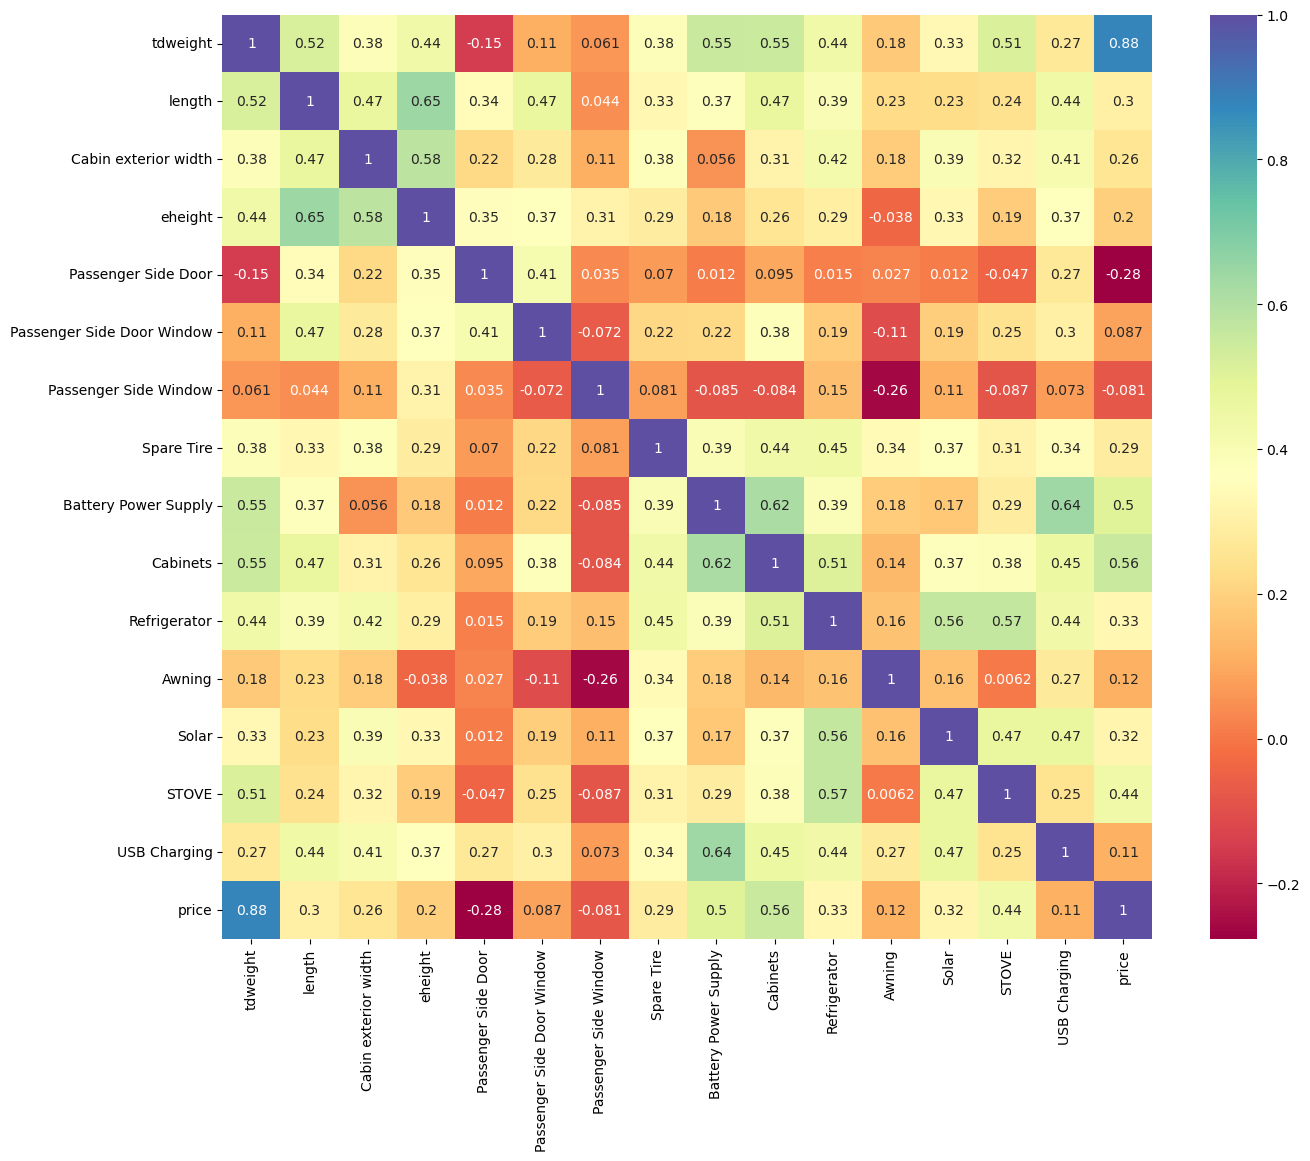

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap="Spectral")

# Machine Learning Modeling
The data is now clean and we can move forward with creating some machine learning models. Once we settle on the best model it can be used to predict the target price of the trailer in question.

In [18]:
data2=data2.drop(data.index[91:])

In [19]:
#here the data is split up into X,y where X contains everything but price and y contains what we want to predict (price)
#price is what we want to predict
X = data2.drop(['price'],axis=1)
y=data2['price']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [21]:
#scaling the data
#this usually helps with modeling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#function which runs different ML models and prints R^2, MAE and RMSE
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    #EVALUATION OF THE MODEL
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    # Plotting y_test and y_pred 
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16) 

Now the data is all cleaned up and ready for creating some machine learning models. A funtion has been written to run various models and output metrics 

R^2 :  0.7377469177880216
MAE : 3002.5103919283797
RMSE: 3993.587193678984


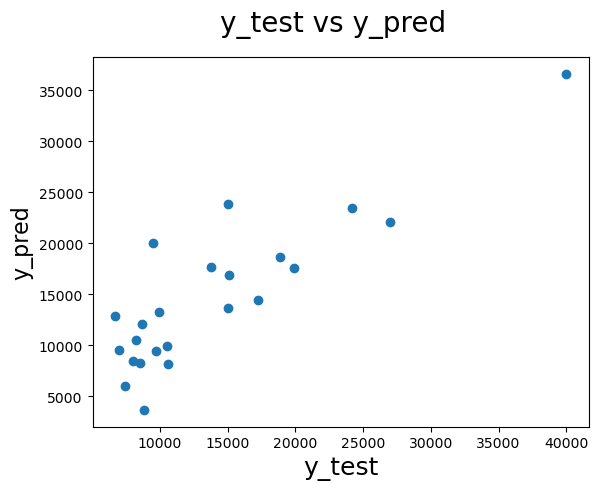

In [23]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.5271801703584074
MAE : 3419.0434782608695
RMSE: 5362.295112129247


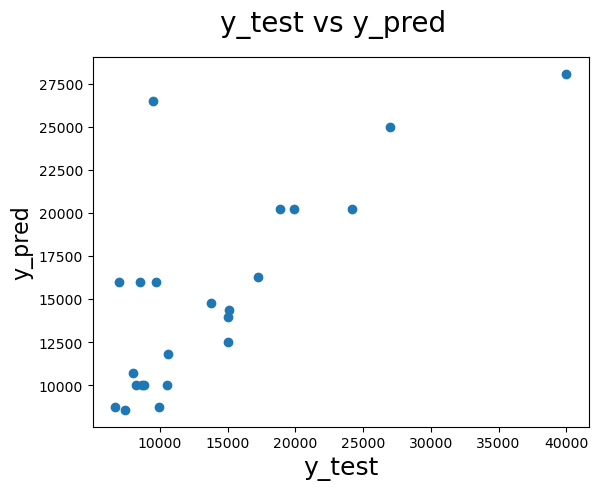

In [24]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.5400807039844427
MAE : 4415.03069558479
RMSE: 5288.6361091994095


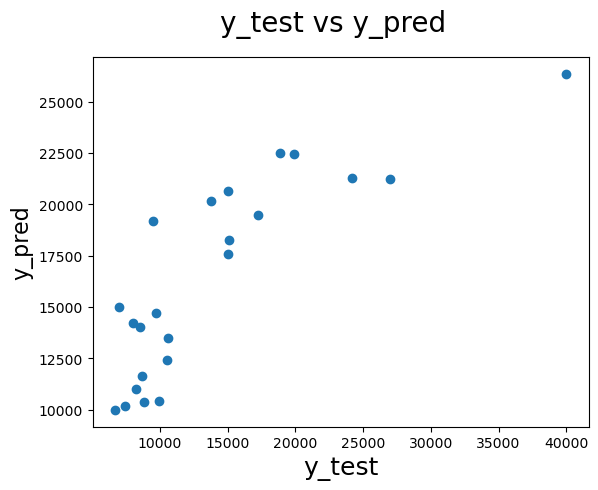

In [25]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.8874076423055242
MAE : 2302.0010585532546
RMSE: 2616.720442058791


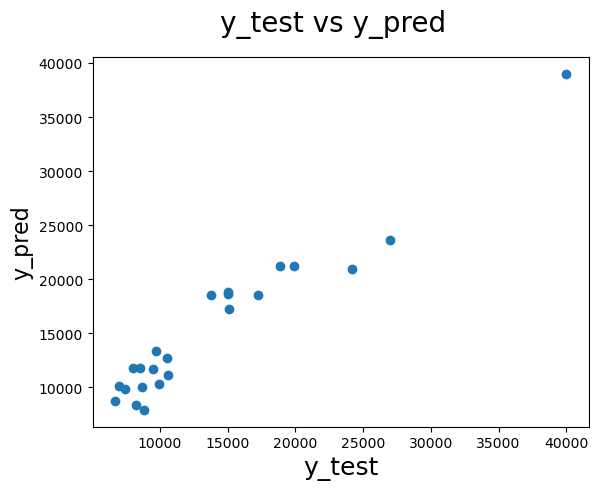

In [26]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.7533790049487894
MAE : 2895.9612854775087
RMSE: 3872.7360060238616


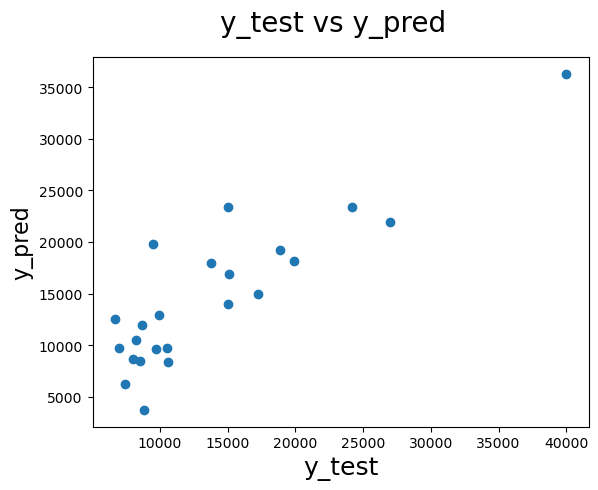

In [27]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.7607779580101073
MAE : 2845.608991119948
RMSE: 3814.200046065376


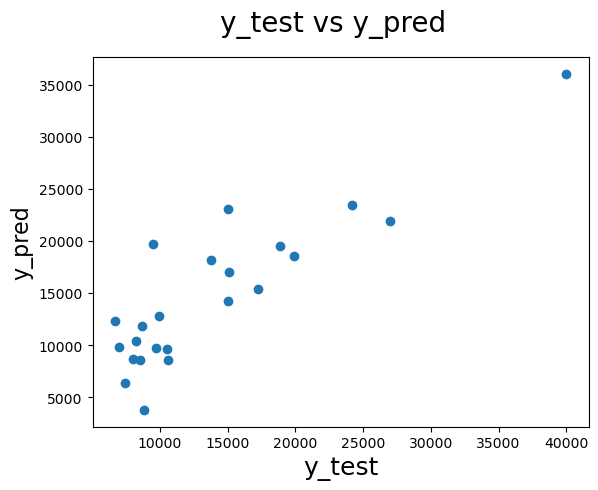

In [28]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.7598151920970075
MAE : 2884.1397614013345
RMSE: 3821.8675971768944


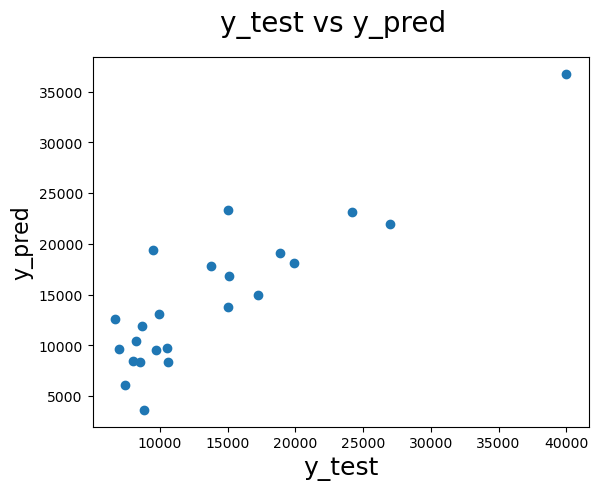

In [29]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  -0.05186258602411753
MAE : 5593.0239959827895
RMSE: 7998.01794825033


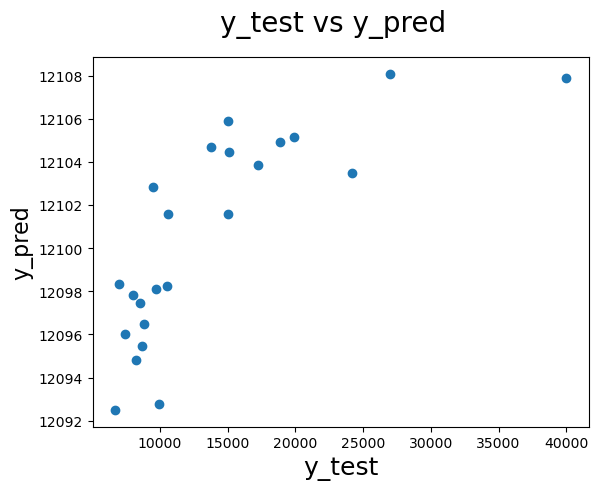

In [30]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  0.8026577815348843
MAE : 2586.4455886239375
RMSE: 3464.279098311022


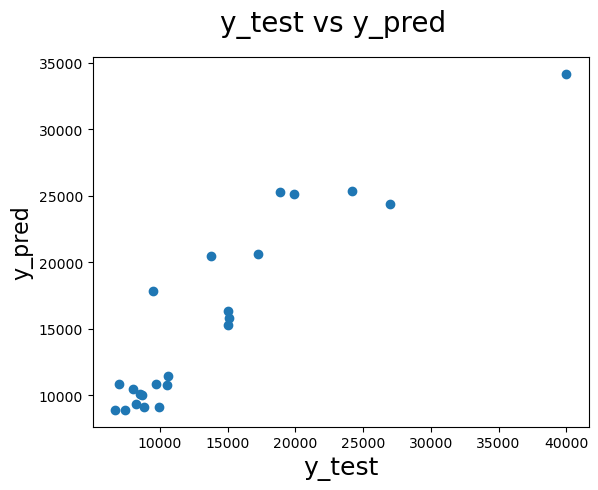

In [31]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

Unsurprisingly, RandomForest preformed better than all the other models tested. Therefore we will move forward with tuning hyperparameters to figure out which produce the best result.

# Checking Feature Importance

The features which have been included thus far are based on features that have enough data available online to realistically include, and picking out which ones are actually important is still in progress. Currently, a more novel feature information (e.g. solar panels) are being mined, while others whihc are already included need to be optimized. One feature which is currently in process of engineering is the number of doors and if they include windows. the information is currently held in 4 seperate columns which have low correlation to the price, and should be combined into a single column containing all of the information to improve calculations. 

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data2.drop(['price'],axis=1)
y=data2['price']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the columns
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score'))  

                         Specs         Score
0                     tdweight  20119.806455
1                       length    287.938202
2         Cabin exterior width    209.611473
3                      eheight    155.769411
13                       STOVE    111.500000
9                     Cabinets     60.752252
10                Refrigerator     60.470588
14                USB Charging     49.382114
12                       Solar     46.906250
8         Battery Power Supply     46.311881
7                   Spare Tire     27.952586
11                      Awning     23.712121
6        Passenger Side Window     21.283582
5   Passenger Side Door Window     19.549669
4          Passenger Side Door      3.000000


[0.21690624 0.15157674 0.14814325 0.14434013 0.01239773 0.03034477
 0.03461366 0.04001951 0.03258083 0.03511512 0.03362415 0.04234208
 0.03165637 0.02326126 0.02307817]


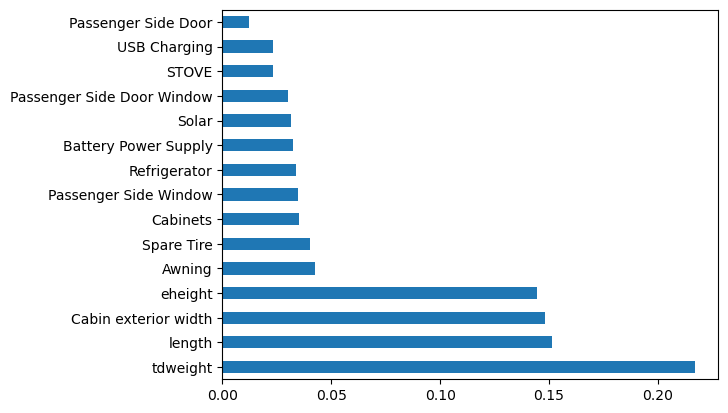

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

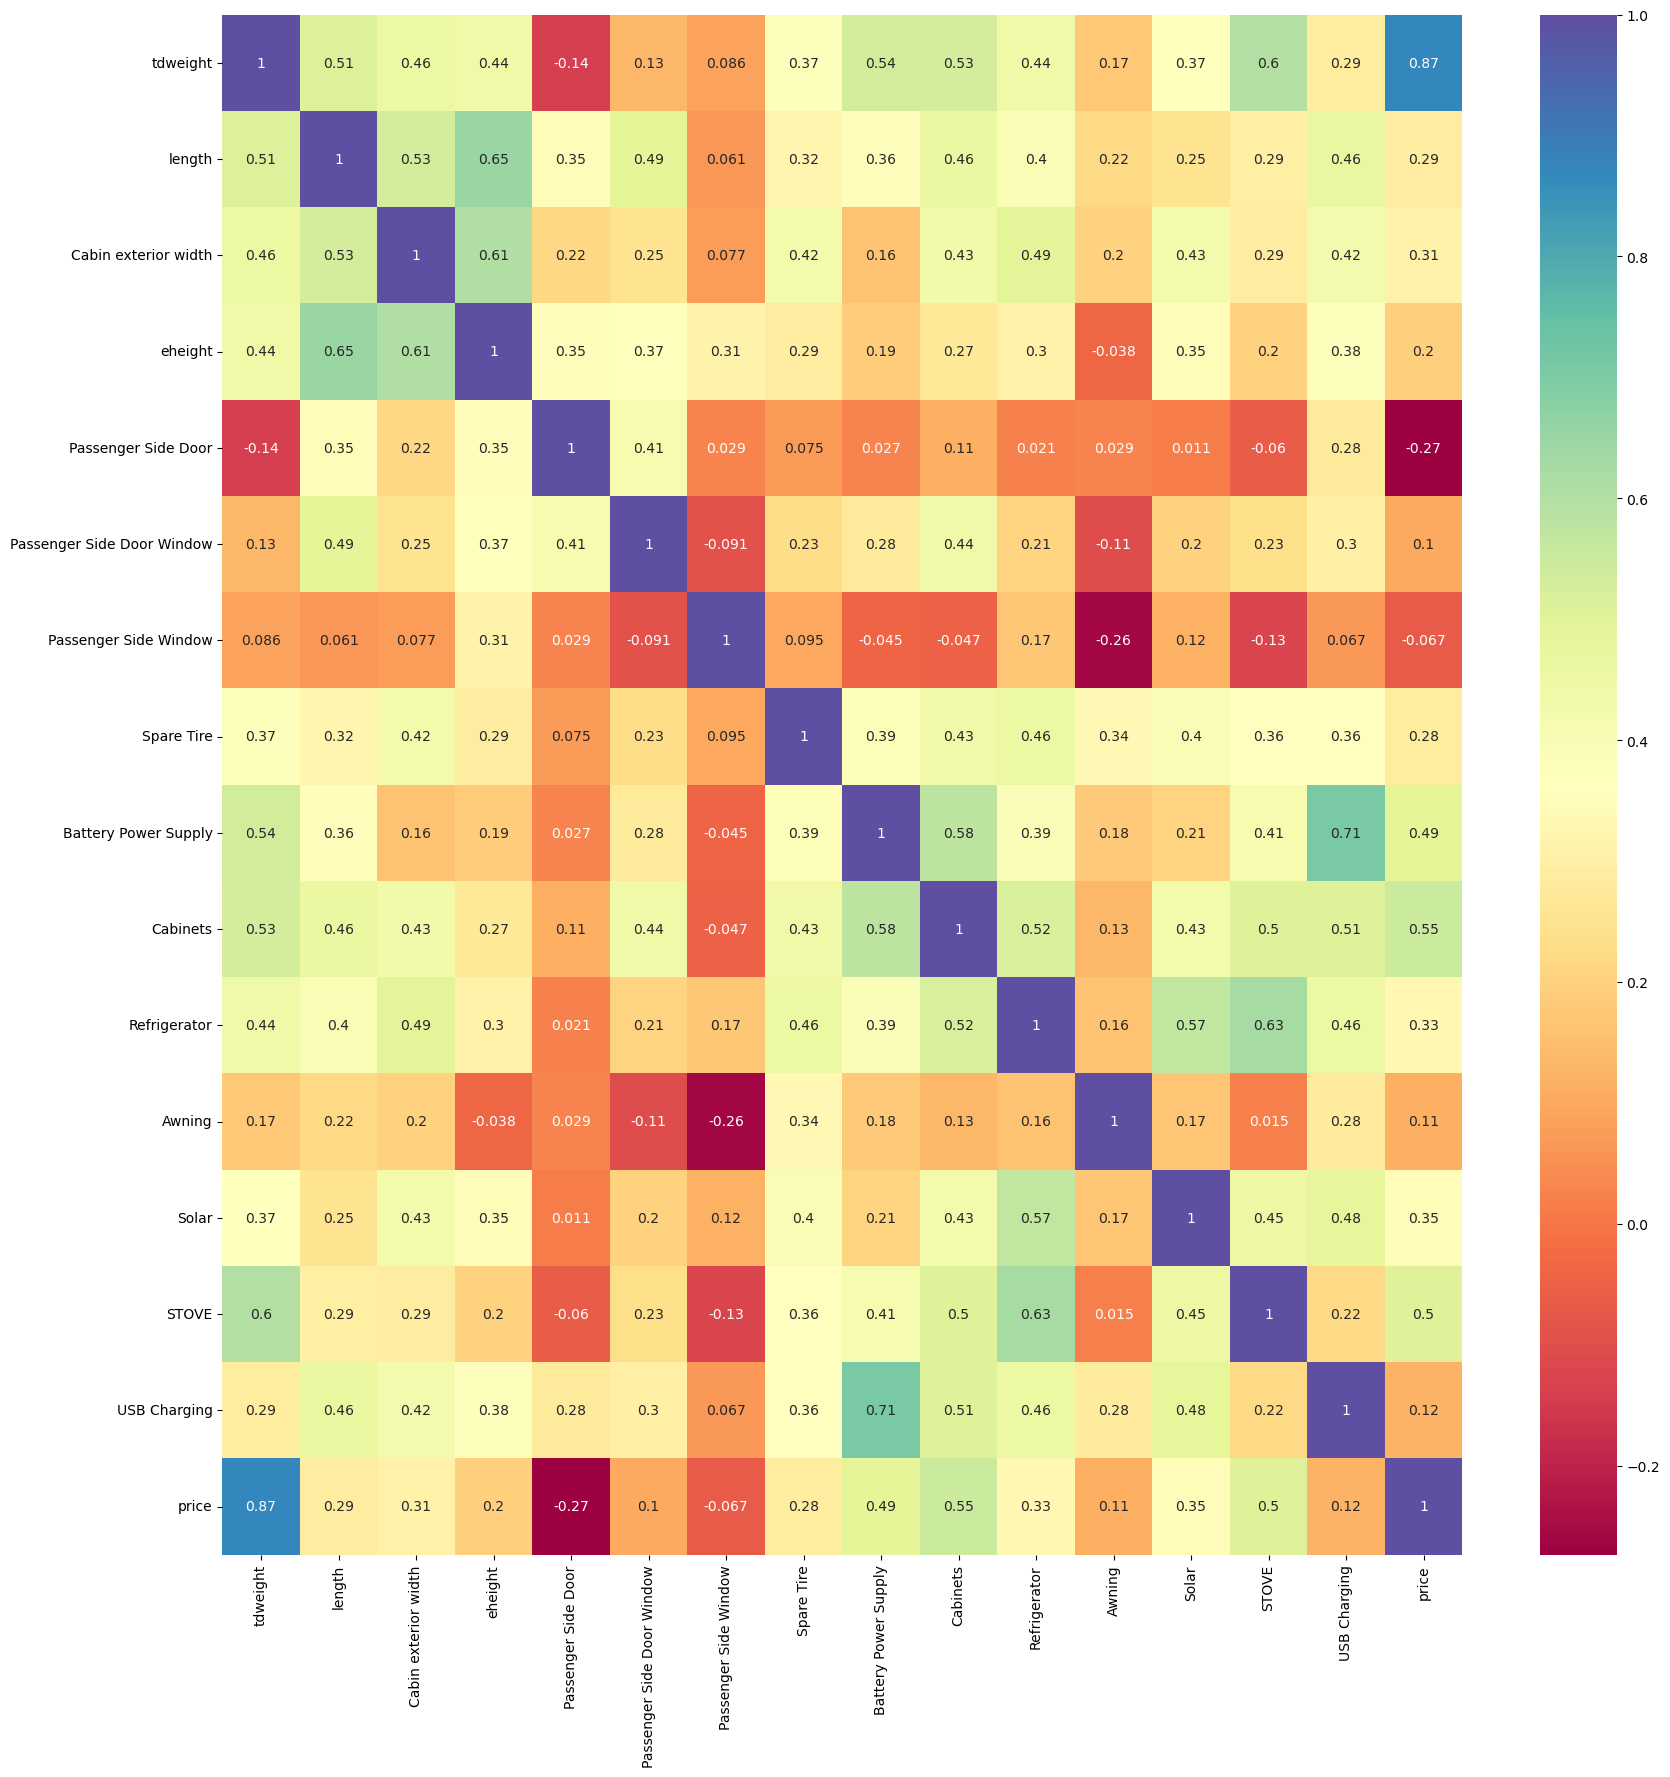

In [34]:
#get correlations of each features in dataset
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data2[top_corr_features].corr(),annot=True,cmap="Spectral")

# Feature Engineering
This section is in progress while more feature data is collected.

In [35]:
#the last columns contain values we want to predict
data3=data.drop(data.index[91:])

In [36]:
data3

,tdweight,length,Cabin exterior width,eheight,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,price
0,1660,198.0,102.0,84.0,1,2,1,2,1,2,2,1,2,2,2,14879
1,1320,144.0,102.0,90.0,1,2,1,2,1,2,2,1,2,2,2,12500
2,1320,144.0,102.0,90.0,1,2,1,2,1,2,2,1,2,2,2,14997
3,1930,185.0,102.0,105.0,1,2,1,2,1,2,2,1,2,2,2,15965
4,2260,188.0,102.0,108.0,1,2,1,2,1,2,2,0,2,2,2,18689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1250,168.0,60.0,68.0,1,2,1,1,2,2,1,1,1,1,2,15099
87,600,137.0,48.5,67.5,1,2,1,1,0,0,0,1,1,0,0,4995
88,900,137.0,60.5,67.5,1,2,1,1,0,0,0,1,1,0,0,6700
89,750,137.0,60.5,67.5,1,2,1,1,0,0,0,1,1,0,0,5900


In [37]:
#removing everything with a negative correlation
X = data3.drop(['price', 'Passenger Side Door', 'Passenger Side Window', 'Awning'],axis=1)
y=data3['price']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    #EVALUATION OF THE MODEL
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16) 

R^2 :  0.6802289226295992
MAE : 3246.7943033017364
RMSE: 4479.694480020354


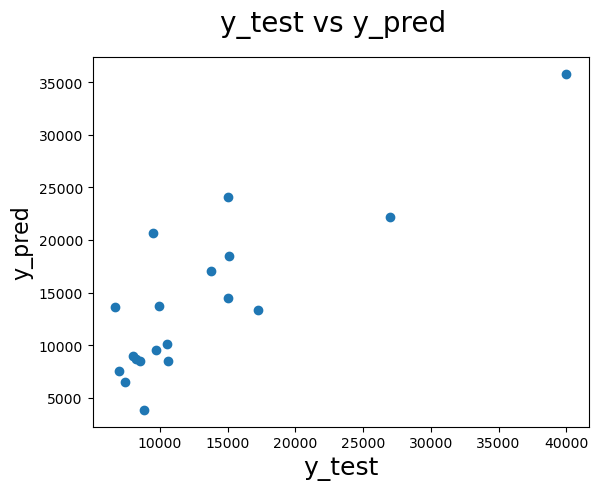

In [41]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.21291684922384535
MAE : 4447.9473684210525
RMSE: 7028.119112761102


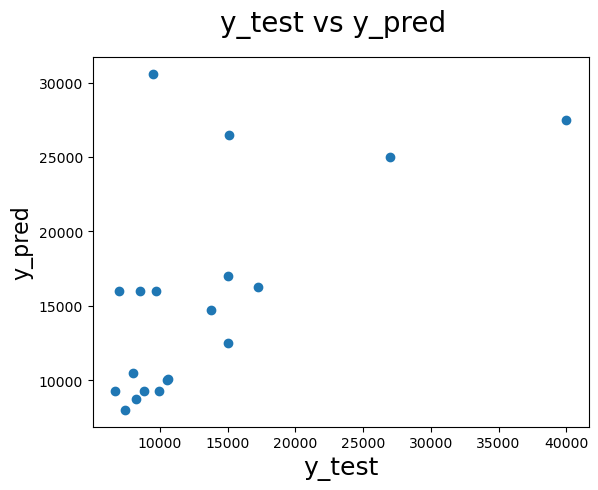

In [42]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.548318597421654
MAE : 4520.002986601447
RMSE: 5324.084139749045


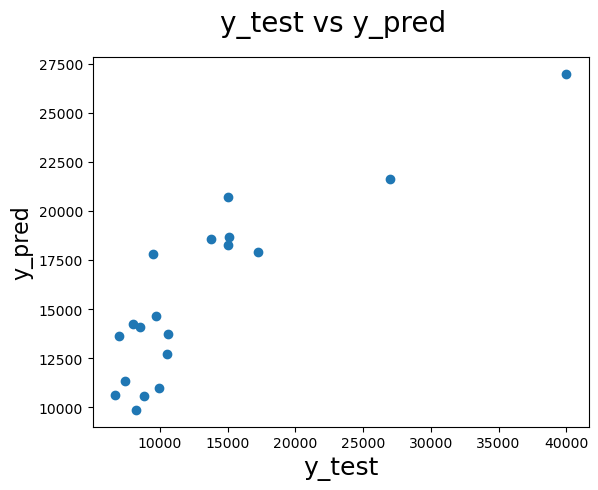

In [43]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.8874661961650859
MAE : 2313.9733483518035
RMSE: 2657.4818378588548


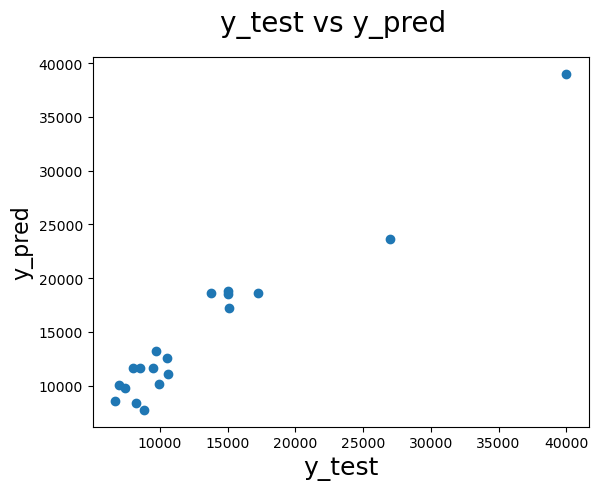

In [44]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.7007144886822874
MAE : 3150.0410913447263
RMSE: 4333.827808583717


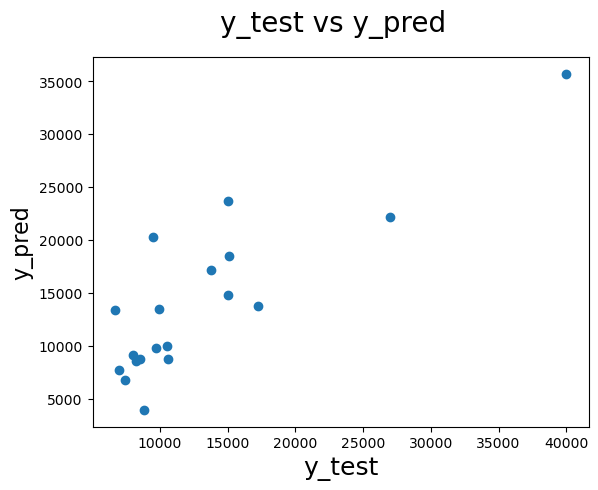

In [45]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.7043021088371302
MAE : 3134.613846946982
RMSE: 4307.774084396491


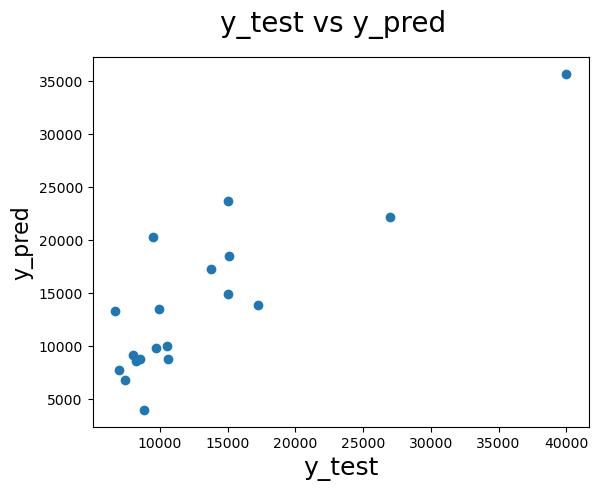

In [46]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.7153928378801688
MAE : 3074.5925329239844
RMSE: 4226.2162738385605


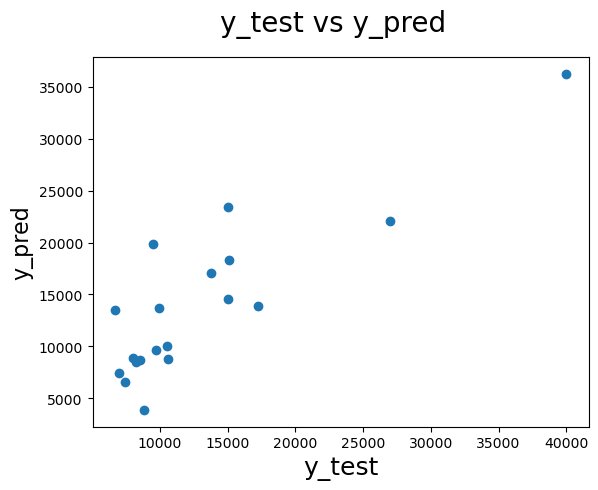

In [47]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  -0.008559671467429197
MAE : 5237.164670300879
RMSE: 7955.722105681687


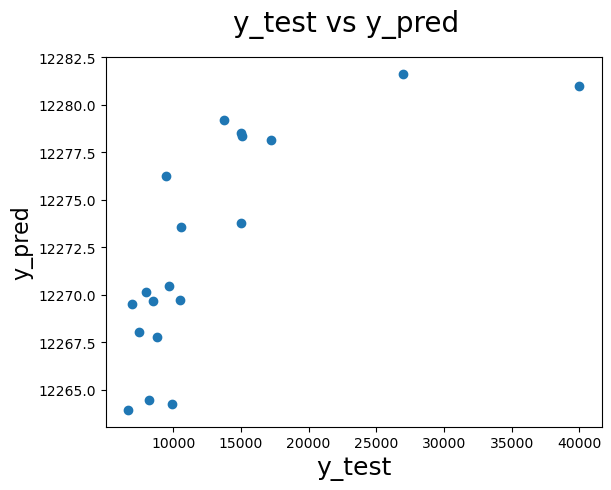

In [48]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  0.8741009923209095
MAE : 2268.112702248047
RMSE: 2810.864814023748


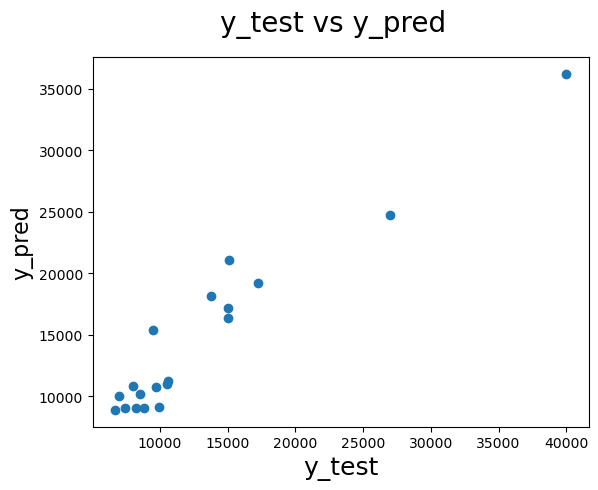

In [49]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

[0.25527486 0.15969448 0.15984634 0.14598713 0.03179826 0.04289467
 0.0401136  0.03528991 0.04041902 0.03793266 0.02432981 0.02641925]


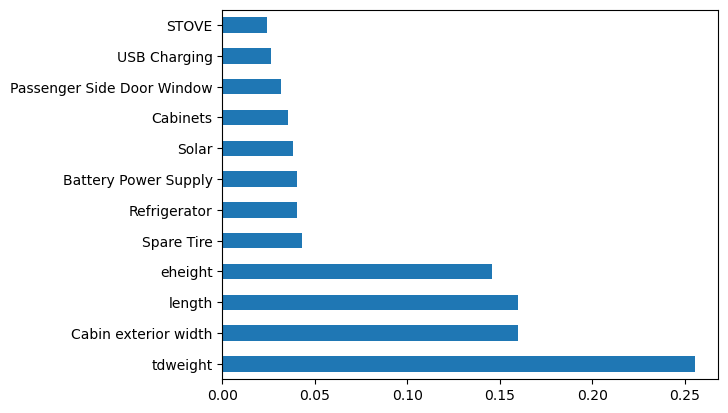

In [50]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Hyperparameter Tuning
Perhaps it is a bit early to get into hyperparameter tuning, but nonetheless the code is ready for once the dataset has been expanded :) Commented out for time saving purposes.

In [51]:
rfc=RandomForestRegressor(random_state=1)

In [52]:
param_grid = { 
    'n_estimators': [100, 500, 1000, 5000],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
    'max_depth' : [5, 10, 15],
    # 'min_samples_leaf' : [1,2,3,5],
     #'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
}


In [53]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 500, 1000, 5000]})

In [54]:
#print the best parameters determined in GridSearchCV
CV_rfc.best_params_

{'max_depth': 10, 'n_estimators': 1000}

R^2 :  0.7356942328587428
MAE : 2659.7962005012537
RMSE: 4072.697231078679


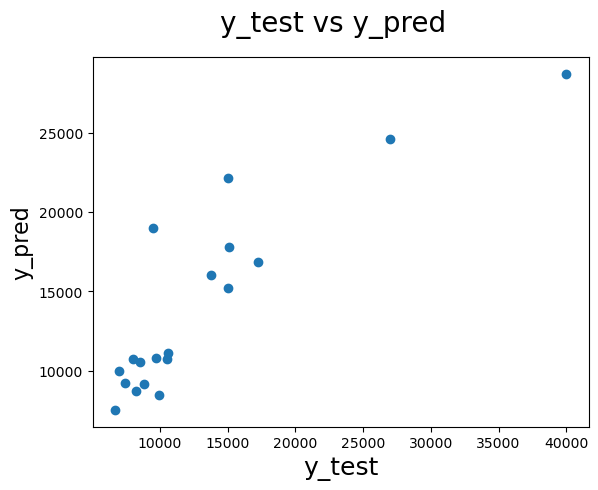

In [55]:
#run a final model using the optimal parameters
final_model = RandomForestRegressor(criterion= 'squared_error', n_estimators=1000, max_features='sqrt', max_depth=15, min_samples_leaf=1, random_state=1)
run_experiment(final_model)

# Checking the value of interest

In [56]:
new_input = data.loc[91:]
new_input

,tdweight,length,Cabin exterior width,eheight,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,price
91,850,144.0,93.0,72.0,1,2,1,1,0,0,0,1,0,0,0,9995
92,850,144.0,93.0,72.0,1,2,1,1,0,0,0,1,0,0,2,9995
93,850,144.0,93.0,72.0,1,2,1,1,0,0,0,1,0,2,2,9995
94,850,144.0,93.0,72.0,1,2,1,1,0,0,0,1,2,2,2,9995
95,850,144.0,93.0,72.0,1,2,1,1,0,0,2,1,2,2,2,9995


In [57]:
#drop the variable to be predicted
new_input=new_input.drop(['price', 'Passenger Side Door', 'Passenger Side Window', 'Awning'],axis=1)
new_input

,tdweight,length,Cabin exterior width,eheight,Passenger Side Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Solar,STOVE,USB Charging
91,850,144.0,93.0,72.0,2,1,0,0,0,0,0,0
92,850,144.0,93.0,72.0,2,1,0,0,0,0,0,2
93,850,144.0,93.0,72.0,2,1,0,0,0,0,2,2
94,850,144.0,93.0,72.0,2,1,0,0,0,2,2,2
95,850,144.0,93.0,72.0,2,1,0,0,2,2,2,2


In [58]:
new_input_scaled = scaler.fit_transform(new_input)

In [59]:
#CV?
new_output = final_model.predict(new_input_scaled)
new_output

array([12898.98966667, 12525.39266667, 14045.75666667, 14218.12333333,
       14782.98233333])

# Notes on the metrics used
✔️ Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂𝑖|
1
n
∑
i
=
1
n
|
y
i
−
y
^
i
|
 

 
Mean Squared Error (MSE) is the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2‾‾‾‾‾‾‾‾‾‾‾‾‾‾⎷
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
📌 Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm?scriptVersionId=117768677&cellId=36

<iframe src="https://www.kaggle.com/embed/faressayah/practical-introduction-to-10-regression-algorithm?cellIds=36&kernelSessionId=117768677" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Practical Introduction to 10 Regression Algorithm"></iframe>